In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = { 'x':[1,2,3,4,5],
'y':[2,4,5,4,5] }
df = pd.DataFrame(data)
X = df[['x']]
Y = df[['y']]
model = LinearRegression()
model.fit(X,Y)
y_pred = model.predict(X)
print("Slope(m):", model.coef_[0])
print("Intercept(c):", model.intercept_)

Slope(m): [0.6]
Intercept(c): [2.2]


         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.786

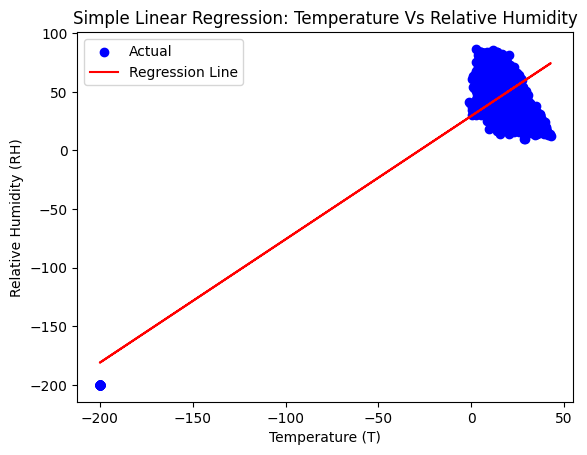

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("AirQuality.csv", delimiter=';')

# Clean up column names by removing leading/trailing spaces
data.columns = data.columns.str.strip()

# Convert relevant columns to numeric, handling commas and errors
for col in ['T', 'RH', 'AH']:
    data[col] = data[col].str.replace(',', '.', regex=False).astype(float)

# Drop the last two columns which are mostly NaN
data = data.iloc[:, :-2]

# Drop rows with NaN values in the relevant columns
data.dropna(subset=['T', 'RH'], inplace=True)

print(data.head())

X = data[['T']]
y = data['RH']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Slope(m):", model.coef_)
print("Intercept(c):", model.intercept_)

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')
# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Temperature (T)')
plt.ylabel('Relative Humidity (RH)')
plt.title('Simple Linear Regression: Temperature Vs Relative Humidity')
plt.legend()
plt.show()